### Voting Classifier

In [1]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_classification

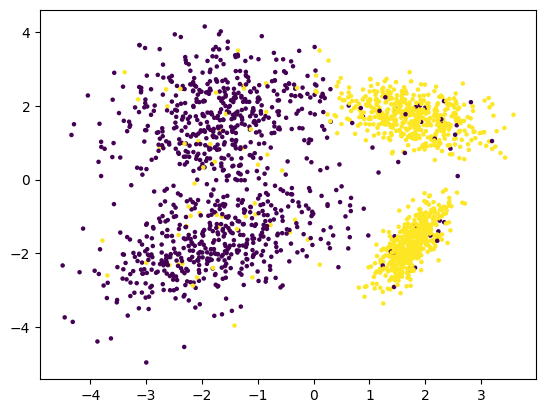

In [2]:
X, y = make_classification(
    n_samples = 2000,
    n_features = 2,
    n_redundant = 0,
    random_state = 21,
    class_sep = 1.75,
    flip_y = 0.1
)
plt.scatter(X[:, 0], X[:, 1], c=y, s=5)

In [4]:
def make_plots():
    X_new = np.concatenate([
        np.random.uniform(np.min(X[:, 0]), np.max(X[:, 0]), (20000, 1)),
        np.random.uniform(np.min(X[:, 1]), np.max(X[:, 1]), (20000, 1))
    ], axis=1)
    plt.figure(figsize=(16, 4))
    plt.subplot(141)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=5)
    plt.title("original data")
    plt.subplot(142)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=clf1.predict_proba(X_new)[:, 1], s=5)
    plt.title("ens1")
    plt.subplot(143)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=clf2.predict_proba(X_new)[:, 1], s=5)
    plt.title("ens2")
    plt.subplot(144)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=clf3.predict_proba(X_new)[:, 1], s=5)
    plt.title("ens3");

2 kinds of models:
Logistic Regression to separate the two classes
KNN would predict based on neighbours

How do we balance?
Voting Classifier([est1, est2],
                    weight = [1,2,3,...])

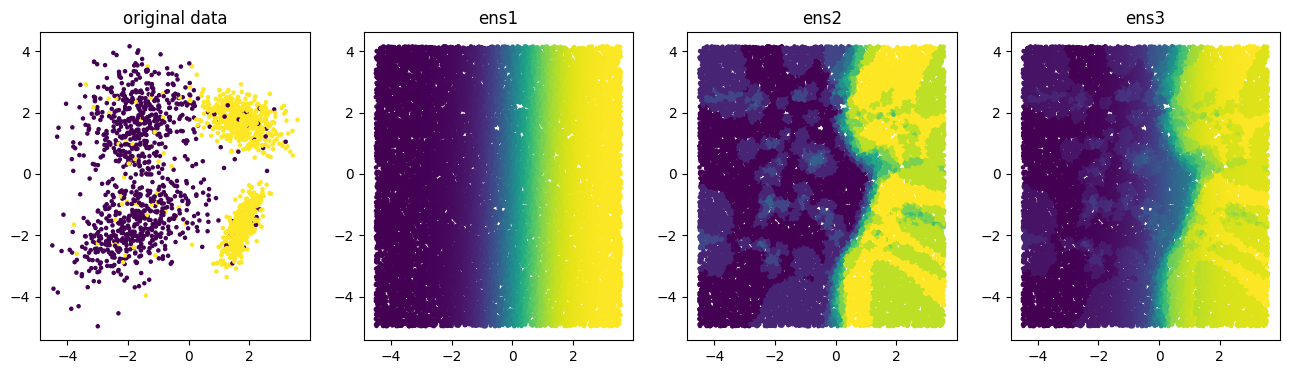

In [5]:
clf1 = LogisticRegression().fit(X, y)
clf2 = KNeighborsClassifier(n_neighbors=10).fit(X, y)
clf3 = VotingClassifier(estimators=[('clf1',clf1), ('clf2',clf2)],
                        voting = 'soft',
                        weights = [0.5,0.5]
                        )

clf3.fit(X, y)

make_plots()

### Threshold

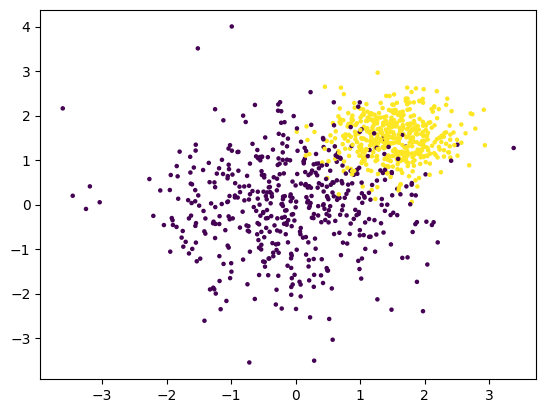

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from sklearn.pipeline import Pipeline
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, make_scorer

from sklego.meta import Thresholder

X, y = make_blobs(1000, centers=[(0, 0), (1.5, 1.5)], cluster_std=[1, 0.5])
plt.scatter(X[:, 0], X[:, 1], c=y, s=5)

Text(0.5, 1.0, 'threshold=0.9')

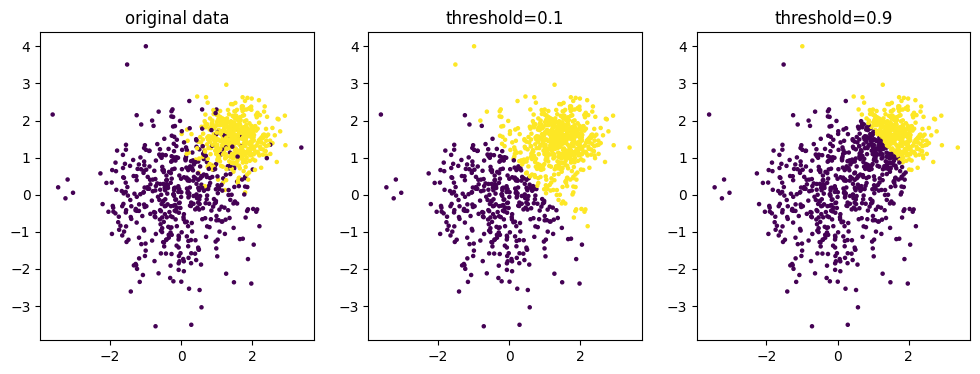

In [8]:
m1 = Thresholder(LogisticRegression(solver='lbfgs'), threshold=0.1).fit(X, y)
m2 = Thresholder(LogisticRegression(solver='lbfgs'), threshold=0.9).fit(X, y)

plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=y, s=5)
plt.title("original data")
plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=m1.predict(X), s=5)
plt.title("threshold=0.1")
plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=m2.predict(X), s=5)
plt.title("threshold=0.9")

In [13]:
pipe.get_params()

{'memory': None,
 'steps': [('model', Thresholder(model=LogisticRegression(), threshold=0.1))],
 'verbose': False,
 'model': Thresholder(model=LogisticRegression(), threshold=0.1),
 'model__check_input': False,
 'model__model__C': 1.0,
 'model__model__class_weight': None,
 'model__model__dual': False,
 'model__model__fit_intercept': True,
 'model__model__intercept_scaling': 1,
 'model__model__l1_ratio': None,
 'model__model__max_iter': 100,
 'model__model__multi_class': 'deprecated',
 'model__model__n_jobs': None,
 'model__model__penalty': 'l2',
 'model__model__random_state': None,
 'model__model__solver': 'lbfgs',
 'model__model__tol': 0.0001,
 'model__model__verbose': 0,
 'model__model__warm_start': False,
 'model__model': LogisticRegression(),
 'model__refit': False,
 'model__threshold': 0.1}

In [11]:
pipe = Pipeline([
    ("model", Thresholder(LogisticRegression(solver='lbfgs'), threshold=0.1))
])

mod = GridSearchCV(estimator=pipe,
                  param_grid = {"model__threshold": np.linspace(0.1, 0.9, 50)},
                  scoring={"precision": make_scorer(precision_score),
                            "recall": make_scorer(recall_score),
                            "accuracy": make_scorer(accuracy_score)},
                  refit="precision",
                  cv=5)

mod.fit(X, y)

In [15]:
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__threshold,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,std_test_recall,rank_test_recall,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,0.017000,0.017956,0.009801,0.003815,0.100000,{'model__threshold': 0.1},0.854701,0.800000,0.775194,0.781250,...,0.004000,1,0.915,0.875,0.855,0.860,0.860,0.873,0.022045,45
1,0.004398,0.001020,0.010003,0.003162,0.116327,{'model__threshold': 0.1163265306122449},0.854701,0.811475,0.787402,0.800000,...,0.004899,2,0.915,0.880,0.865,0.875,0.865,0.880,0.018439,43
2,0.006397,0.003498,0.009804,0.003125,0.132653,{'model__threshold': 0.1326530612244898},0.854701,0.831933,0.793651,0.800000,...,0.004899,2,0.915,0.895,0.870,0.875,0.870,0.885,0.017607,41
3,0.005792,0.002925,0.005603,0.002419,0.148980,{'model__threshold': 0.1489795918367347},0.862069,0.831933,0.793651,0.819672,...,0.004899,2,0.920,0.895,0.870,0.890,0.875,0.890,0.017607,40
4,0.006399,0.003559,0.007000,0.003744,0.165306,{'model__threshold': 0.1653061224489796},0.869565,0.831933,0.806452,0.819672,...,0.008000,5,0.925,0.895,0.880,0.890,0.875,0.893,0.017493,38
5,0.003594,0.000795,0.005404,0.001744,0.181633,{'model__threshold': 0.1816326530612245},0.877193,0.853448,0.819672,0.833333,...,0.008000,5,0.930,0.910,0.890,0.900,0.890,0.904,0.014967,35
6,0.003800,0.000748,0.003798,0.000979,0.197959,{'model__threshold': 0.1979591836734694},0.884956,0.852174,0.819672,0.840336,...,0.009798,7,0.935,0.905,0.890,0.905,0.890,0.905,0.016432,34
7,0.003602,0.000487,0.003798,0.001162,0.214286,{'model__threshold': 0.2142857142857143},0.892857,0.852174,0.826446,0.853448,...,0.008944,8,0.940,0.905,0.895,0.910,0.895,0.909,0.016553,32
8,0.003884,0.002079,0.004798,0.001721,0.230612,{'model__threshold': 0.2306122448979592},0.892857,0.858407,0.840336,0.853448,...,0.011662,9,0.940,0.905,0.905,0.910,0.895,0.911,0.015297,30
9,0.004201,0.001941,0.004503,0.001344,0.246939,{'model__threshold': 0.2469387755102041},0.892857,0.866071,0.840336,0.868421,...,0.011662,9,0.940,0.910,0.905,0.920,0.900,0.915,0.014142,27


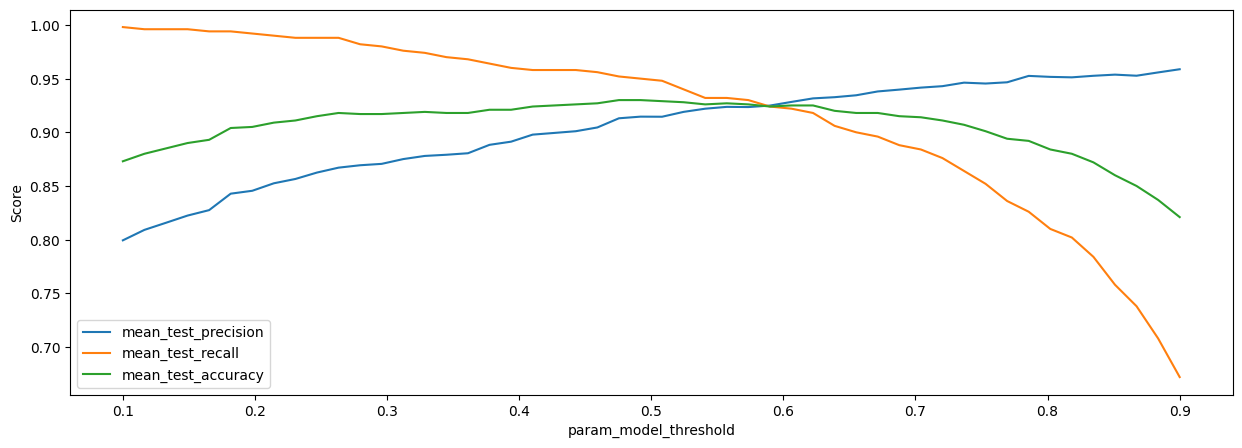

In [17]:
plt.figure(figsize=(15,5))
df_results =  pd.DataFrame(mod.cv_results_)

for score in ['mean_test_precision', 'mean_test_recall', 'mean_test_accuracy']:
    plt.plot(df_results['param_model__threshold'],
            df_results[score],
            label = score
            )
plt.xlabel('param_model_threshold')
plt.ylabel('Score')
plt.legend()

### Grouped Models

In [21]:
df.head(3)

,weight,time,chick,diet
0,42,0,1,1
1,51,2,1,1
2,59,4,1,1


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklego.datasets import load_chicken
from sklego.preprocessing import ColumnSelector

df = load_chicken(as_frame=True)

def plot_model(model):
    df = load_chicken(as_frame=True)
    model.fit(df[['diet', 'time']], df['weight'])
    metric_df = df[['diet', 'time', 'weight']].assign(pred=lambda d: model.predict(d[['diet','time']]))
    metric = mean_absolute_error(metric_df['weight'], metric_df['pred'])
    plt.figure(figsize=(12,4))

    for i in [1, 2, 3, 4]:
        pltr = metric_df[['time', 'diet', 'pred']].drop_duplicates().loc[lambda d: d['diet'] == i]
        plt.plot(pltr['time'], pltr['pred'], color = '.rbgy'[i])
    plt.title(f"linear model per group, MAE: {np.round(metric, 2)}")

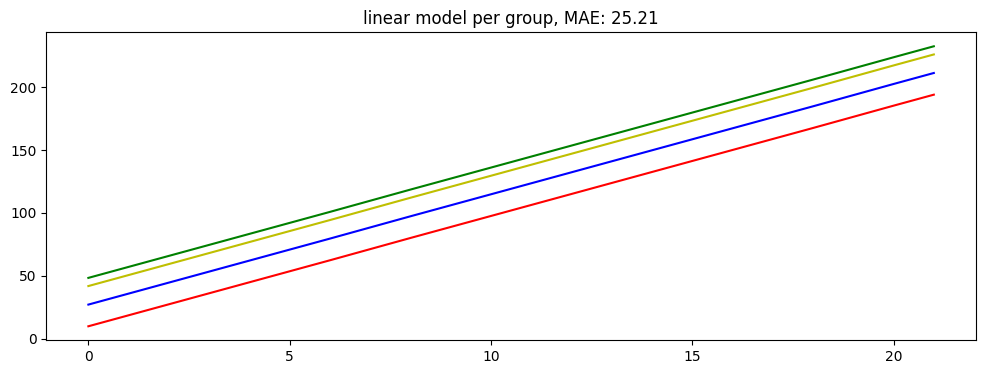

In [24]:
feature_pipeline = Pipeline([
    ("datagrab", FeatureUnion([
        ("discrete", Pipeline([
            ("grab", ColumnSelector("diet")),
            ("encode", OneHotEncoder(categories="auto", sparse_output=False))
        ])),
        ("continuous", Pipeline([
            ("grab", ColumnSelector("time")),
            ("standardize", StandardScaler())
        ]))
    ]))
])

pipe = Pipeline([
    ("transform", feature_pipeline),
    ("model", LinearRegression())
])

plot_model(pipe)

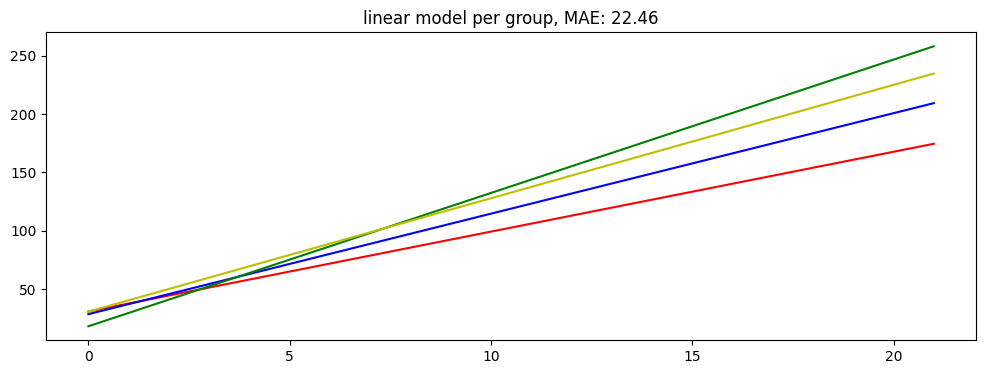

In [25]:
from sklego.meta import GroupedPredictor
mod = GroupedPredictor(LinearRegression(), groups=['diet'])
plot_model(mod)

### Zero Inflated Regression

In [26]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.model_selection import cross_val_score
from sklego.meta import ZeroInflatedRegressor

# Note the final line of code in this block. We're setting y=0 for all weekend dates
# while we simulate standard regression data for all the other dates.
df = (pd.DataFrame({'dt': pd.date_range("2018-01-01", "2021-01-01")})
      .assign(x=lambda d: np.random.normal(0, 1, d.shape[0]))
      .assign(weekend = lambda d: (d['dt'].dt.weekday >= 5).astype(np.int16))
      .assign(y=lambda d: np.where(d['weekend'], 0, 1.5 + 0.87 * d['x'] + np.random.normal(0, 0.2, d.shape[0]))))

In [27]:
X, y = df[['x', 'weekend']].values, df['y'].values

In [28]:
zir = ZeroInflatedRegressor(
    classifier=LogisticRegression(),
    regressor=Ridge()
)

lr = Ridge(random_state=0)

print('ZIR r²:', cross_val_score(zir, X, y).mean())
print(' LR r²:', cross_val_score(lr, X, y).mean())

ZIR r²: 0.9723293329900653
 LR r²: 0.8185368326063381


### Decay

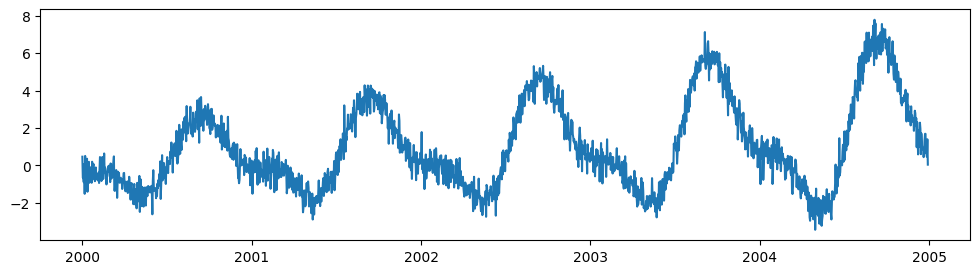

In [29]:
from sklearn.dummy import DummyRegressor
from sklego.meta import GroupedPredictor, DecayEstimator
from sklego.datasets import make_simpleseries
import matplotlib.pylab as plt 

yt = make_simpleseries(seed=1)
dates = pd.date_range("2000-01-01", periods=len(yt))
df = (pd.DataFrame({"yt": yt,
                  "date": dates})
      .assign(m=lambda d: d.date.dt.month)
      .reset_index())

plt.figure(figsize=(12, 3))
plt.plot(dates, make_simpleseries(seed=1));

In [32]:
_ = DummyRegressor().fit
?_

Signature: _(X, y, sample_weight=None)
Docstring:
Fit the random regressor.

Parameters
----------
X : array-like of shape (n_samples, n_features)
    Training data.

y : array-like of shape (n_samples,) or (n_samples, n_outputs)
    Target values.

sample_weight : array-like of shape (n_samples,), default=None
    Sample weights.

Returns
-------
self : object
    Fitted estimator.
File:      c:\users\amirah\python_projects\scikit-learn\.venv\lib\site-packages\sklearn\dummy.py
Type:      method

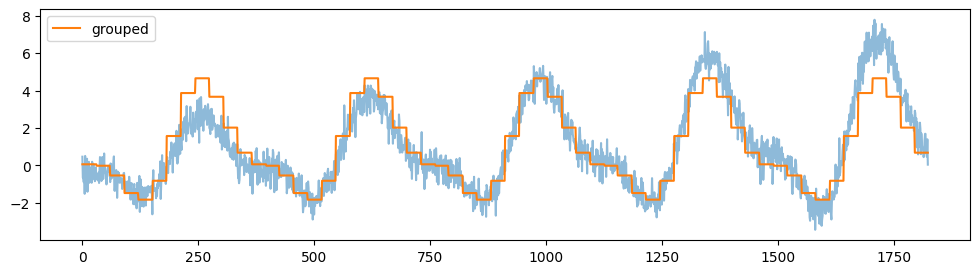

In [30]:
mod1 = (GroupedPredictor(DummyRegressor(), groups=["m"])
  .fit(df[['m']], df['yt']))

plt.figure(figsize=(12, 3))
plt.plot(df['yt'], alpha=0.5);
plt.plot(mod1.predict(df[['m']]), label="grouped")
plt.legend();

Overshooting in the past, undershooting in the future

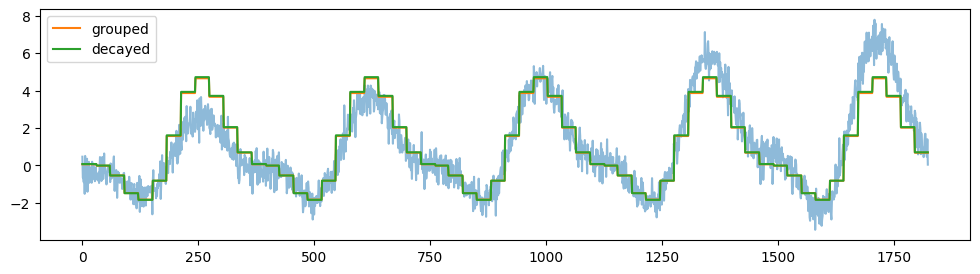

In [31]:
mod1 = (GroupedPredictor(DummyRegressor(), groups=["m"])
  .fit(df[['m']], df['yt']))

mod2 = (GroupedPredictor(DecayEstimator(DummyRegressor(), decay=0.9), groups=["m"])
        .fit(df[['index', 'm']], df['yt']))

plt.figure(figsize=(12, 3))
plt.plot(df['yt'], alpha=0.5);
plt.plot(mod1.predict(df[['m']]), label="grouped")
plt.plot(mod2.predict(df[['index', 'm']]), label="decayed")
plt.legend();